In [2]:
''' FOR DEVELOPMENT ONLY, DELETE CELL '''

# set auto reload imported modules tagged
%load_ext autoreload
%autoreload 2

# data array processing
#import numpy as np
#import pandas as pd

# plotting with matplotlib
#%matplotlib widget
#from matplotlib import pyplot as plt

## development override params
pvlibs_path = '/home/brendan/dev/pvlibs'
# base_path = '../data/slt'


In [3]:
''' initialise notebook '''

# add location to path
#pvlibs_path = '/srv/pvlibs'
import sys
sys.path.append(pvlibs_path)

# plotting with matplotlib, set interactive figure display
%matplotlib widget

# import pvlibs package
import pvlibs


In [4]:
# data array processing
import numpy as np

# image processing
import PIL


In [9]:
''' import measurement files '''

# define directory to search; "./" for current directory, "../" for up one directory
base_path = '../data/pl-diff/init'

# define measurement properties (!required!)
props = {
    # define measurement properties
    'state': 'init',
    
    # measurement type
    'meas_type': 'ocpl', # 'ocpl' for open-circuit photoluminescence
    'file_ext': 'tif', # ['tif']
    'file_type': 'tif', # ['tif']
    
    # wafer properties
    
    # measurement conditions
    'exposure': 0.5, # define global pl exposure, read from file if available

}

# generate measurement file database
db = pvlibs.init_file_db(base_path, props)


begin file search and import 

imported reference to file: 21391 - LDSE_P08 (Delta n Image).tif
imported reference to file: 21391 - LDSE_P08 (Uncalibrated PL Image).tif
imported reference to file: 21391 - LDSE_P08 (Calibrated Lifetime Image).tif
imported reference to file: 21406 - LDSE_P04 (Delta n Image).tif
imported reference to file: 21406 - LDSE_P04 (Calibrated Lifetime Image).tif
imported reference to file: 21406 - LDSE_P04 (Uncalibrated PL Image).tif
imported reference to file: 21381 - LDSE_P06 (Uncalibrated PL Image).tif
imported reference to file: 21381 - LDSE_P06 (Delta n Image).tif
imported reference to file: 21381 - LDSE_P06 (Calibrated Lifetime Image).tif
imported reference to file: 21387 - LDSE_P29 (Delta n Image).tif
imported reference to file: 21387 - LDSE_P29 (Uncalibrated PL Image).tif
imported reference to file: 21387 - LDSE_P29 (Calibrated Lifetime Image).tif
imported reference to file: 21413 - LDSE_P25 (Delta n Image).tif
imported reference to file: 21413 - LDSE_P25

In [10]:
''' import measurement files '''

# define directory to search; "./" for current directory, "../" for up one directory
base_path = '../data/pl-diff/fired'

# define measurement properties (!required!)
props = {
    # define measurement properties
    'state': 'fired',
    
    # measurement type
    'meas_type': 'ocpl', # 'ocpl' for open-circuit photoluminescence
    'file_ext': 'tif', # ['tif']
    'file_type': 'tif', # ['tif']
    
    # wafer properties
    
    # measurement conditions
    'exposure': 0.5, # define global pl exposure, read from file if available

}

# generate measurement file database
db = [ *db, *pvlibs.init_file_db(base_path, props) ]


begin file search and import 

imported reference to file: 23001 - LDSE_P29 (Delta n Image).tif
imported reference to file: 23001 - LDSE_P29 (Uncalibrated PL Image).tif
imported reference to file: 23001 - LDSE_P29 (Calibrated Lifetime Image).tif
imported reference to file: 23015 - LDSE_P03 (Calibrated Lifetime Image).tif
imported reference to file: 23015 - LDSE_P03 (Delta n Image).tif
imported reference to file: 23015 - LDSE_P03 (Uncalibrated PL Image).tif
imported reference to file: 22999 - LDSE_P08 (Calibrated Lifetime Image).tif
imported reference to file: 22999 - LDSE_P08 (Uncalibrated PL Image).tif
imported reference to file: 22999 - LDSE_P08 (Delta n Image).tif
imported reference to file: 23044 - LDSE_P06 (Delta n Image).tif
imported reference to file: 23044 - LDSE_P06 (Calibrated Lifetime Image).tif
imported reference to file: 23044 - LDSE_P06 (Uncalibrated PL Image).tif
imported reference to file: 22994 - LDSE_P25 (Calibrated Lifetime Image).tif
imported reference to file: 2299

In [11]:
''' import measurement files '''

# define directory to search; "./" for current directory, "../" for up one directory
base_path = '../data/pl-diff/anneal'

# define measurement properties (!required!)
props = {
    # define measurement properties
    'state': 'anneal',
    
    # measurement type
    'meas_type': 'ocpl', # 'ocpl' for open-circuit photoluminescence
    'file_ext': 'tif', # ['tif']
    'file_type': 'tif', # ['tif']
    
    # wafer properties
    
    # measurement conditions
    'exposure': 0.5, # define global pl exposure, read from file if available

}

# generate measurement file database
db = [ *db, *pvlibs.init_file_db(base_path, props) ]


begin file search and import 

imported reference to file: 26410 - LDSE_P44_0p1s (Delta n Image).tif
imported reference to file: 26410 - LDSE_P44_0p1s (Calibrated Lifetime Image).tif
imported reference to file: 26410 - LDSE_P44_0p1s (Uncalibrated PL Image).tif
imported reference to file: 26397 - LDSE_P03_0p05s (Calibrated Lifetime Image).tif
imported reference to file: 26397 - LDSE_P03_0p05s (Delta n Image).tif
imported reference to file: 26397 - LDSE_P03_0p05s (Uncalibrated PL Image).tif
imported reference to file: 26440 - LDSE_P02_0p1s (Calibrated Lifetime Image).tif
imported reference to file: 26440 - LDSE_P02_0p1s (Delta n Image).tif
imported reference to file: 26440 - LDSE_P02_0p1s (Uncalibrated PL Image).tif
imported reference to file: 26441 - LDSE_P01_0p1s (Delta n Image).tif
imported reference to file: 26441 - LDSE_P01_0p1s (Calibrated Lifetime Image).tif
imported reference to file: 26441 - LDSE_P01_0p1s (Uncalibrated PL Image).tif
imported reference to file: 26398 - LDSE_P04_0

In [12]:
''' parse parameters from file name '''

# example: "h555_fired-830C_D23_TC.ltr"

# define single parameter separator; e.g. '-', '_', or '\s' (space)
param_sep = '\s'

# define ordered list of parameters within filename separated by param_sep
params = [
    'plid',
    'misc1',
    'device',
    'misc2',
    'misc3',
    'misc4',
]

# parse file name parameters from each measurement file
db = pvlibs.parse_file_names(db, param_sep, params)


begin file name parameter parsing 

parsing: file 1/144
parsing: file 2/144
parsing: file 3/144
parsing: file 4/144
parsing: file 5/144
parsing: file 6/144
parsing: file 7/144
parsing: file 8/144
parsing: file 9/144
parsing: file 10/144
parsing: file 11/144
parsing: file 12/144
parsing: file 13/144
parsing: file 14/144
parsing: file 15/144
parsing: file 16/144
parsing: file 17/144
parsing: file 18/144
parsing: file 19/144
parsing: file 20/144
parsing: file 21/144
parsing: file 22/144
parsing: file 23/144
parsing: file 24/144
parsing: file 25/144
parsing: file 26/144
parsing: file 27/144
parsing: file 28/144
parsing: file 29/144
parsing: file 30/144
parsing: file 31/144
parsing: file 32/144
parsing: file 33/144
parsing: file 34/144
parsing: file 35/144
parsing: file 36/144
parsing: file 37/144
parsing: file 38/144
parsing: file 39/144
parsing: file 40/144
parsing: file 41/144
parsing: file 42/144
parsing: file 43/144
parsing: file 44/144
parsing: file 45/144
parsing: file 46/144
parsing

In [14]:

print(len(db))

# strip non uncal pl images
db = [n for n in db if 'Uncalibrated PL Image' in n['file_name']]

print(len(db))

144
48


In [17]:
''' update device name from filename parse'''
for node in db:
    
    a = node['device'].split('_')
    
    node['diffusion'] = a[0]
    node['device'] = a[1]


In [18]:
db[0]

{'state': 'init',
 'meas_type': 'ocpl',
 'file_ext': 'tif',
 'file_type': 'tif',
 'exposure': 0.5,
 'file_name': '21391 - LDSE_P08 (Uncalibrated PL Image).tif',
 'file_path': '../data/pl-diff/init/LDSE_P08 - 2018-11-08 03-41-24 PM',
 'plid': '21391',
 'misc1': '-',
 'device': 'P08',
 'misc2': '(Uncalibrated',
 'misc3': 'PL',
 'misc4': 'Image)',
 'diffusion': 'LDSE'}

In [19]:
''' import image data '''

# import data from files
db = pvlibs.import_file_data(db)


begin file data import 

importing: file 1/48
importing: file 2/48
importing: file 3/48
importing: file 4/48
importing: file 5/48
importing: file 6/48
importing: file 7/48
importing: file 8/48
importing: file 9/48
importing: file 10/48
importing: file 11/48
importing: file 12/48
importing: file 13/48
importing: file 14/48
importing: file 15/48
importing: file 16/48
importing: file 17/48
importing: file 18/48
importing: file 19/48
importing: file 20/48
importing: file 21/48
importing: file 22/48
importing: file 23/48
importing: file 24/48
importing: file 25/48
importing: file 26/48
importing: file 27/48
importing: file 28/48
importing: file 29/48
importing: file 30/48
importing: file 31/48
importing: file 32/48
importing: file 33/48
importing: file 34/48
importing: file 35/48
importing: file 36/48
importing: file 37/48
importing: file 38/48
importing: file 39/48
importing: file 40/48
importing: file 41/48
importing: file 42/48
importing: file 43/48
importing: file 44/48
importing: file 

In [20]:
''' normalise image exposure '''

# define reference exposure to normalise (or leave none for auto maximum value)
ref_exp = None

# normalise pl images to reference exposure
db = pvlibs.norm_pl_exposure(db, ref_exp)


begin pl image normalisation 

processing: measurement 1/48
processing: measurement 2/48
processing: measurement 3/48
processing: measurement 4/48
processing: measurement 5/48
processing: measurement 6/48
processing: measurement 7/48
processing: measurement 8/48
processing: measurement 9/48
processing: measurement 10/48
processing: measurement 11/48
processing: measurement 12/48
processing: measurement 13/48
processing: measurement 14/48
processing: measurement 15/48
processing: measurement 16/48
processing: measurement 17/48
processing: measurement 18/48
processing: measurement 19/48
processing: measurement 20/48
processing: measurement 21/48
processing: measurement 22/48
processing: measurement 23/48
processing: measurement 24/48
processing: measurement 25/48
processing: measurement 26/48
processing: measurement 27/48
processing: measurement 28/48
processing: measurement 29/48
processing: measurement 30/48
processing: measurement 31/48
processing: measurement 32/48
processing: measur

In [25]:

[ (len([n for n in db if n['device'] == d]), d) for d in list(set([ n['device'] for n in db ])) ]


[(3, 'P25'),
 (3, 'P04'),
 (3, 'P28'),
 (3, 'P24'),
 (1, 'P33'),
 (3, 'P03'),
 (3, 'P01'),
 (3, 'P07'),
 (3, 'P23'),
 (3, 'P29'),
 (3, 'P02'),
 (3, 'P44'),
 (2, 'P05'),
 (3, 'P08'),
 (3, 'P27'),
 (3, 'P06'),
 (3, 'P26')]

In [3]:

file_names = {'131408 - H436 ASFIRED830C D16 0s05 5V (Uncalibrated PL Image).tif':'1',
              '130925 - H436 ASDEP D16 0s05 5V (Uncalibrated PL Image).tif':'2', ## reference
              '130031 - H436 ASFIRED D14 0S05 5V (Uncalibrated PL Image).tif':'3',
              '129955 - H436 ASDEP D13 0s05 5V (Uncalibrated PL Image).tif':'4',}

images = []

for file_name in file_names.keys():
    img = pvlibs.data_import.photoluminescence_image.parse_format_tif(_file_path = './data/'+file_name)['raw_image']
    images.append(img)
    #_img = pvlibs.process_data.photoluminescence_image.rotate_zero_shift_image(img, _angle_lim = 1.5, _angle_step = 0.1, _edge = .1)
    #im = PIL.Image.fromarray(_img)
    #im.save('./data/crop/'+file_name)


0.009999999999999842 -1.0009775171065494 1.0009775171065494


<IPython.core.display.Javascript object>


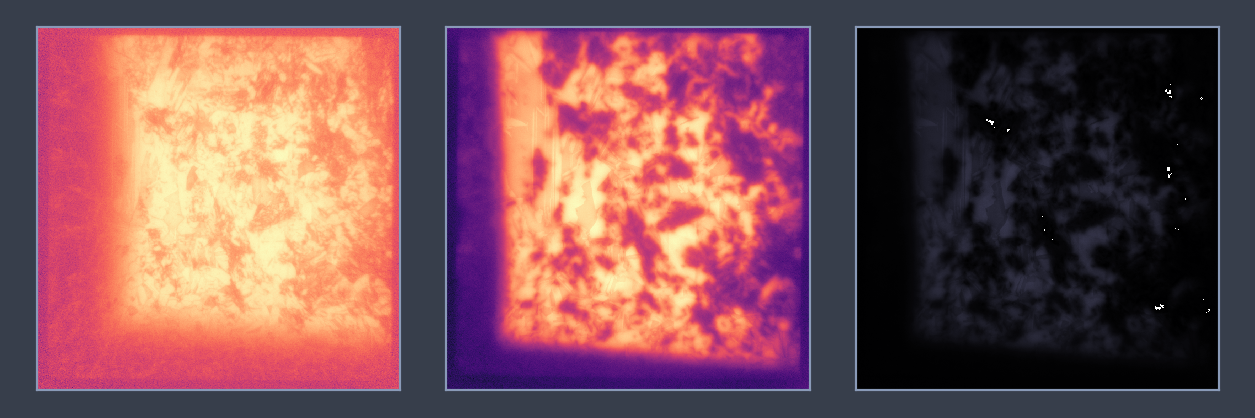

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


In [4]:
## pre-post image difference

## select test images
ref = images[1] ## control image
img = images[2]

ali = pvlibs.process_data.photoluminescence_image.align_images(img, ref, _mode = 'fine')

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.grid(); plt.xticks([]); plt.yticks([])
plt.imshow(np.log(ref), cmap='magma')

plt.subplot(132)
plt.grid(); plt.xticks([]); plt.yticks([])
plt.imshow(np.log(img), cmap='magma')

diff = ali - img

plt.subplot(133)
plt.grid(); plt.xticks([]); plt.yticks([])
plt.imshow(diff, cmap='bone_r')

plt.tight_layout()
plt.show()
